# Finding Significant CNVs

We want to know what CNVs are shared among different types of cancer. Here we Identify CNVs in each type of cancer, and then user those lists to find genes that are the similarly lost or gained in several types of cancer. We also map these genes to their respective chromosomes. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac

## Load CNV Data

In [4]:
en = cptac.Endometrial()
brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
gbm = cptac.Gbm()
hnscc = cptac.Hnscc()
luad = cptac.Luad()
ovarian = cptac.Ovarian()
colon = cptac.Colon()
lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 4)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 5)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 6)


version 3scc v3.2.......                    


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 9)


In [5]:
en_cnv = en.get_CNV()
brca_cnv = brca.get_CNV()
ccrcc_cnv = ccrcc.get_CNV()
gbm_cnv = gbm.get_CNV()
hnscc_cnv = hnscc.get_CNV()
luad_cnv = luad.get_CNV()
ovarian_cnv = ovarian.get_CNV()
colon_cnv = colon.get_CNV()
lscc_cnv = lscc.get_CNV()

## Create Summary Tables

In [6]:
def separate(hiCut, lowCut, data):
  """
  Counts the Number of patients with high and low values for each gene.
  """
  sepDict = dict()
  for column in data:
    numHi = 0
    numLow = 0
    numNeu = 0
    for i in data[column]:
        if i > hiCut:
            numHi += 1
        elif i < lowCut:
            numLow += 1
        else:
            numNeu += 1 
    sepDict[column] = [numHi, numNeu, numLow]
  return sepDict

In [7]:
def get_counts_and_average(data):
  """
  Takes a CNV dataframe and generates a dataframe with the counts of high, low and neutral values
  """
  df = pd.DataFrame(data = separate(.3,-.2,data), index = ["amplifications", "neutral", "deletions"])
  df = df.append(pd.DataFrame(data.mean(0), columns=['average']).transpose(), sort=True)
  return df.transpose()

In [8]:
en_counts = get_counts_and_average(en_cnv)
gbm_counts = get_counts_and_average(gbm_cnv)
brca_counts = get_counts_and_average(brca_cnv)
hnscc_counts = get_counts_and_average(hnscc_cnv)
luad_counts = get_counts_and_average(luad_cnv)
ovarian_counts = get_counts_and_average(ovarian_cnv)
ccrcc_counts = get_counts_and_average(ccrcc_cnv)
colon_counts = get_counts_and_average(colon_cnv)
lscc_counts = get_counts_and_average(lscc_cnv)

In [ ]:
# These summary tables will be used for a lot of different analyses. Rather than generating them every time,
# we will save them so that we can just load them into future notebooks.

# Because the tables are already saved, I have commented this section out.
# en_counts.to_csv("count_tables/en_counts.csv")
# gbm_counts.to_csv("count_tables/gbm_counts.csv")
# brca_counts.to_csv("count_tables/brca_counts.csv")
# hnscc_counts.to_csv("count_tables/hnscc_counts.csv")
# luad_counts.to_csv("count_tables/luad_counts.csv")
# ovarian_counts.to_csv("count_tables/ovarian_counts.csv")
# ccrcc_counts.to_csv("count_tables/ccrcc_counts.csv")
# colon_counts.to_csv("count_tables/colon_counts.csv")
# lscc_counts.to_csv("count_tables/lscc_counts.csv")

## Finding Significant Genes in each Cancer Type

In [9]:
en_sig_genes_up = list(en_counts[en_counts.amplifications >= 20].index.get_level_values(0))
gbm_sig_genes_up = list(gbm_counts[gbm_counts.amplifications >= 20].index)
brca_sig_genes_up = list(brca_counts[brca_counts.amplifications >= 20].index.get_level_values(0))
hnscc_sig_genes_up = list(hnscc_counts[hnscc_counts.amplifications >= 20].index)
luad_sig_genes_up = list(luad_counts[luad_counts.amplifications >= 20].index)
ovarian_sig_genes_up = list(ovarian_counts[ovarian_counts.amplifications >= 20].index)
ccrcc_sig_genes_up = list(ccrcc_counts[ccrcc_counts.amplifications >= 20].index.get_level_values(0))
colon_sig_genes_up = list(colon_counts[colon_counts.amplifications >= 20].index)
lscc_sig_genes_up = list(lscc_counts[lscc_counts.amplifications >= 20].index)

In [10]:
en_sig_genes_down = list(en_counts[en_counts.deletions >= 20].index.get_level_values(0))
gbm_sig_genes_down = list(gbm_counts[gbm_counts.deletions >= 20].index)
brca_sig_genes_down = list(brca_counts[brca_counts.deletions >= 20].index.get_level_values(0))
hnscc_sig_genes_down = list(hnscc_counts[hnscc_counts.deletions >= 20].index)
luad_sig_genes_down = list(luad_counts[luad_counts.deletions >= 20].index)
ovarian_sig_genes_down = list(ovarian_counts[ovarian_counts.deletions >= 20].index)
ccrcc_sig_genes_down = list(ccrcc_counts[ccrcc_counts.deletions >= 20].index.get_level_values(0))
colon_sig_genes_down = list(colon_counts[colon_counts.deletions >= 20].index)
lscc_sig_genes_down = list(lscc_counts[lscc_counts.deletions >= 20].index)

In [11]:
# This is a dataframe from Uniprot that contains the chromosome location information for genes.
chromosomes = pd.read_csv('uniprot_chromosomes.csv')

In [12]:
chromosomes = chromosomes.drop(columns=['Unnamed: 0'])

## Common Sig Genes

In [13]:
def CountFrequency(my_list): 
  """
  Counts the frequency of the gene in the given list.
  Returns a list of genes that appeared 3 or more times.
  """
  freq = {} 
  for items in my_list: 
      freq[items] = my_list.count(items) 
  sig = []
  for key, value in freq.items(): 
    if value >= 4: # This value sets how many types of cancer the gene must be sig in to include. It can be altered to be more strict or lenient.
      sig.append(key)
  return sig

In [14]:
sig_genes_up = CountFrequency(en_sig_genes_up +
                              gbm_sig_genes_up +
                              brca_sig_genes_up +
                              hnscc_sig_genes_up +
                              luad_sig_genes_up +
                              ovarian_sig_genes_up +
                              ccrcc_sig_genes_up +
                              colon_sig_genes_up +
                              lscc_sig_genes_up)

In [15]:
sig_genes_down = CountFrequency(en_sig_genes_down +
                                gbm_sig_genes_down +
                                brca_sig_genes_down +
                                hnscc_sig_genes_down +
                                luad_sig_genes_down +
                                ovarian_sig_genes_down +
                                ccrcc_sig_genes_down +
                                colon_sig_genes_down +
                                lscc_sig_genes_down)

In [16]:
# Creates a dataframe with the chromosome location attached to each of our significant genes
sig_genes_up_df = chromosomes[chromosomes.gene.isin(sig_genes_up)]

In [17]:
# We want just the number of the chromosome (for display purposes)
sig_genes_up_df['chromosome'] = sig_genes_up_df['chromosome'].str.extract(pat='([0-9,X,Y]+)')

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


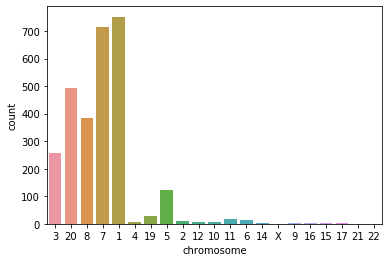

In [18]:
sns.countplot(x='chromosome', data=sig_genes_up_df)

In [19]:
sig_genes_down_df = chromosomes[chromosomes.gene.isin(sig_genes_down)]

In [20]:
sig_genes_down_df['chromosome'] = sig_genes_down_df['chromosome'].str.extract(pat='([0-9,X,Y]+)')

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


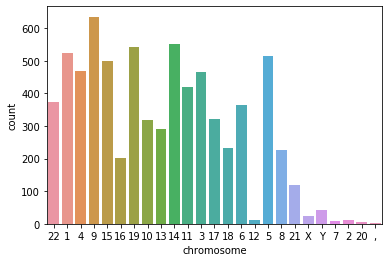

In [21]:
sns.countplot(x='chromosome', data=sig_genes_down_df)